<a href="https://colab.research.google.com/github/thatadi/Regression-Techniques/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
ds=pd.read_csv("dataset.csv")
ds


,x,y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


In [34]:
x=np.array(ds['x'])
y=np.array(ds['y'])
x_mn=x.mean()
y_mn=y.mean()


In [35]:
nr=0
dr=0
for i in range(len(x)):
  nr=nr+((x[i]-x_mn)*(y[i]-y_mn))
  dr=dr+((x[i]-x_mn)**2)
m=nr/dr
c=y_mn-(m*x_mn )
print(m,c)

0.4 2.4


In [36]:
yp=[]
for i in range(len(x)):

  a=m*x[i]+c
  yp.append(a)
yp


[2.8, 3.2, 3.6, 4.0, 4.4]

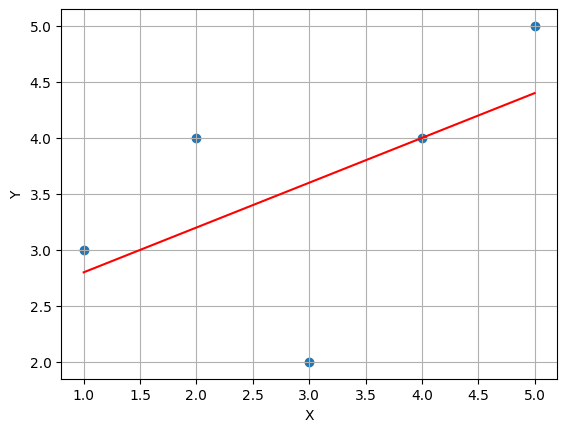

In [37]:
plt.scatter(x,y)
plt.plot(x,yp,color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# Gradient Descent

In [38]:
l=0.01
m=0
c=0
epochs=100
for e in range (epochs):
  yhat=m*x+c
  error=y-yhat
  m+=l*(error*x).mean()
  c+=l*error.mean()
print(f'{m = :.2f}')
print(f'{c = :.2f}')
print(f'y = {m:.2f}x + {c:.2f}')



m = 0.90
c = 0.60
y = 0.90x + 0.60


In [39]:
yp = m*x+c
print(f'{yp = }')


yp = array([1.5020657 , 2.39929308, 3.29652046, 4.19374783, 5.09097521])


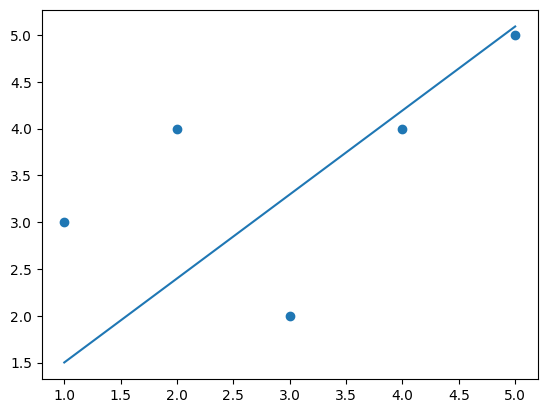

In [40]:
plt.scatter(x, y)
plt.plot(x,yp)

# Multiple Regression

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [43]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [44]:
x=df.drop('sales',axis=1)
y=df['sales']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [47]:
reg=LinearRegression().fit(x_train,y_train)
print(reg.intercept_)
for i in range(len(reg.coef_)):
    print(x.columns[i],reg.coef_[i],sep=" ")

2.7089490925159065
TV 0.04405928095746522
radio 0.19928749689893954
newspaper 0.006882452222275487


In [48]:
reg.score(x_train,y_train)

0.9055159502227753

In [49]:
ypred=reg.predict(x_test)
print("After prediction:- ")
ypred

After prediction:- 


array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [50]:
mean_squared_error(y_test,ypred)

3.79679723671522

<Axes: xlabel='sales'>

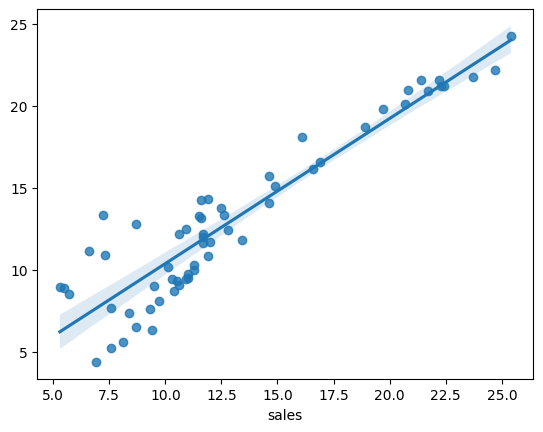

In [51]:
sns.scatterplot()
sns.regplot(x=y_test,y=ypred)

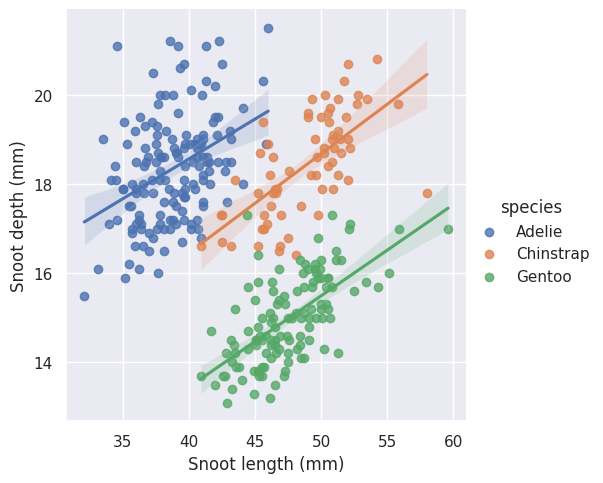

In [52]:
import seaborn as sns
sns.set_theme()

penguins = sns.load_dataset("penguins")


g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)


g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

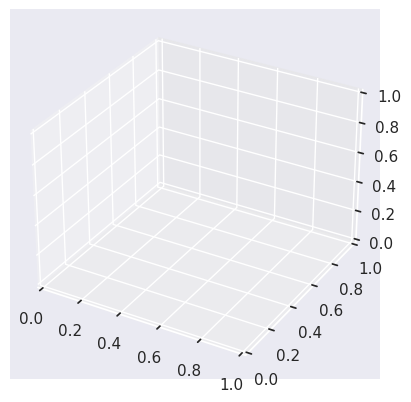

In [53]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')